# Proyecto empresa de telecomunicaciones.

## Descripción del proyecto

Este proyecto se realizará con el objetivo de analizar los datos provistos por una empresa de telecomunicaciones, específicamente dos tarifas distintas de prepago, para determinar si alguno de ellos genera mayores ingresos y en base a eso ajustar el presupuesto de publicidad.

El trabajo será realizado sobre las tarifas de 500 clientes seleccionados por la empresa para el año 2018.

Durante el análisis, de realizarán dos pruebas de hipótesis. La primera, ver si el ingreso promedio de los usuarios de cada tarifa difiere. La segunda, ver si el ingreso promedio de los usuarios en el área de New York/New Jersey es diferente a la de los usuarios en otras regiones. 



## Descripción de datos.

Voy a utilizar 5 tablas enviadas por la empresa: 
    
La tabla 'users' (datos sobre los usuarios):

        - user_id — identificador único del usuario
        - first_name — nombre del usuario
        - last_name — apellido del usuario
        - age — edad del usuario (en años)
        - reg_date — fecha de suscripción (dd, mm, aa)
        - churn_date — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
        - city — ciudad de residencia del usuario
        - plan — nombre de la tarifa

 La tabla 'calls' (datos sobre las llamadas):
        
        - id — identificador único de la llamada
        - call_date — fecha de la llamada
        - duration — duración de la llamada (en minutos)
        - user_id — el identificador del usuario que realiza la llamada

 La tabla 'messages' (datos sobre los SMS):
       
        - id — identificador único del SMS
        - message_date — fecha del SMS
        - user_id — el identificador del usuario que manda el SMS

 La tabla 'internet' (datos sobre las sesiones web):
       
        - id — identificador único de la sesión
        - mb_used — el volumen de datos gastados durante la sesión (en megabytes)
        - session_date — fecha de la sesión web
        - user_id — identificador del usuario

 La tabla 'plans' (datos sobre las tarifas):
 
        - plan_name — nombre de la tarifa
        - usd_monthly_fee — pago mensual en dólares estadounidenses
        - minutes_included — minutos incluidos al mes
        - messages_included — SMS incluidos al mes
        - mb_per_month_included — datos incluidos al mes (en megabytes)
        - usd_per_minute — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
        - usd_per_message — precio por SMS tras exceder los límites del paquete
        - usd_per_gb — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)


## Importación de librerías y archivos. 

A continuación, daré inicio al análisis importando las distintas librerías que voy a utilizar.

In [ ]:
# Importación de librerías

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

Importo los distintos archivos con toda la información provista por la empresa.

In [ ]:
#Importación de archivos

llamadas= pd.read_csv('/datasets/megaline_calls.csv')
internet= pd.read_csv('/datasets/megaline_internet.csv') 
mensajes= pd.read_csv('/datasets/megaline_messages.csv') 
planes= pd.read_csv('/datasets/megaline_plans.csv') 
usuarios= pd.read_csv('/datasets/megaline_users.csv')

## Exploración y tratamiento de datos.

Comenzaré con la investigación de todos los archivos para ver si hay algún dato o columna que necesite tratamiento. 

In [ ]:
#Estudio de la tabla llamadas

llamadas.info()
llamadas.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [ ]:
# Busco todas las llamadas que duraron 0 segundos

llamadas[llamadas['duration'] == 0.0]  #tenemos 26834 filas con llamadas que duraron 0.0

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [ ]:
# Voy a utilizar solo los datos cuyas llamadas duraron más de 0 segundos.

llamadas_filtradas= llamadas[llamadas['duration'] > 0]

In [ ]:
# Chequeo dataframe

llamadas_filtradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
llamadas_filtradas['duration']= np.ceil(llamadas_filtradas['duration'])
llamadas_filtradas.head()

/tmp/ipykernel_67/3313936390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llamadas_filtradas['duration']= np.ceil(llamadas_filtradas['duration'])


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [ ]:
# Cambio tipo de dato columna call date y agrego columna month

llamadas_filtradas['call_date']= pd.to_datetime(llamadas_filtradas['call_date'], format='%Y-%m-%d')
llamadas_filtradas['mes']=  llamadas_filtradas['call_date'].dt.month 
llamadas_filtradas.head()


/tmp/ipykernel_67/4057564672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llamadas_filtradas['call_date']= pd.to_datetime(llamadas_filtradas['call_date'], format='%Y-%m-%d')
/tmp/ipykernel_67/4057564672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llamadas_filtradas['mes']=  llamadas_filtradas['call_date'].dt.month


,id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [ ]:
# Agrupo las llamadas segun usuario y mes

llamadas_agrupadas= llamadas_filtradas.pivot_table(index=['user_id', 'mes'], values='duration', aggfunc=['count', 'sum'])
llamadas_agrupadas.columns= ['cant_llamadas','duracion']
llamadas_agrupadas

cant_llamadas  duracion
user_id mes                         
1000    12              16     124.0
1001    8               22     182.0
        9               38     315.0
        10              47     393.0
        11              49     426.0
...                    ...       ...
1498    12              32     339.0
1499    9               35     346.0
        10              41     385.0
        11              39     308.0
        12              56     496.0

[2256 rows x 2 columns]

Como se puede observar, la tabla 'llamadas', tiene llamadas (26 834) cuya duración son de 0 segundos. Interpretando que esas llamadas corresponden a llamadas perdidas, seran removidas de la tabla. le cambie el tipo de dato a la columna 'call_date' a datetime e hice una pivot table para agrupar por mes y por usuario todas las llamadas realizadas. No tiene valores nulos.

In [ ]:
#Investigación tabla mensajes

mensajes.info()
mensajes.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [ ]:
# Cambio tipo de dato columna message date y agrego columna mes

mensajes['message_date']= pd.to_datetime(mensajes['message_date'], format='%Y-%m-%d')
mensajes['mes']=  mensajes['message_date'].dt.month 
mensajes.head()

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [ ]:
# Agrupo los datos de los mensajes según usario y mes

mensajes_agrupados= mensajes.pivot_table(index=['user_id', 'mes'], values='id', aggfunc='count') 
mensajes_agrupados.columns= ['cant_mensajes']
mensajes_agrupados

Fue modificado el tipo de dato de la columna 'message_date' a datetime y luego creé una pivot table para agrupar según los usuarios y los meses y calcular la cantidad de mensajes enviados en esas fechas. No tiene valores nulos.

In [ ]:
#Estudio de la tabla internet

internet.info()
internet.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [ ]:
# Chequeo datos de internet donde no se usaron mb

internet[internet['mb_used'] == 0]  # tenemos 13747 ingresos a internet donde no se usaron los datos del plan   

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


In [ ]:
# Voy a utilizar solo lo datos que usaron los mb

internet_filtrado= internet[internet['mb_used'] > 0]
internet_filtrado.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


In [ ]:
# Cambio los mb a gigas

internet_filtrado['mb_used']= internet_filtrado['mb_used']/1024

internet_filtrado



/tmp/ipykernel_67/2931687952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_filtrado['mb_used']= internet_filtrado['mb_used']/1024


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,0.087754
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590
5,1001_0,1001,2018-08-24,0.278008
...,...,...,...,...
104819,1499_214,1499,2018-10-18,0.255010
104820,1499_215,1499,2018-10-20,0.212949
104821,1499_216,1499,2018-12-30,0.297578
104822,1499_217,1499,2018-09-22,0.285889


In [ ]:
# Cambio tipo de dato de la columna session date y agrego columna mes

internet_filtrado['session_date']= pd.to_datetime(internet_filtrado['session_date'], format='%Y-%m-%d')
internet_filtrado['mes']=  internet_filtrado['session_date'].dt.month 
internet_filtrado

/tmp/ipykernel_67/302834613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_filtrado['session_date']= pd.to_datetime(internet_filtrado['session_date'], format='%Y-%m-%d')
/tmp/ipykernel_67/302834613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_filtrado['mes']=  internet_filtrado['session_date'].dt.month


,id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,0.087754,12
2,1000_379,1000,2018-12-28,0.644922,12
3,1000_413,1000,2018-12-26,0.264639,12
4,1000_442,1000,2018-12-27,0.859590,12
5,1001_0,1001,2018-08-24,0.278008,8
...,...,...,...,...,...
104819,1499_214,1499,2018-10-18,0.255010,10
104820,1499_215,1499,2018-10-20,0.212949,10
104821,1499_216,1499,2018-12-30,0.297578,12
104822,1499_217,1499,2018-09-22,0.285889,9


In [ ]:
# Agrupo los datos de internet según usuario y mes

internet_agrupado= internet_filtrado.pivot_table(index=['user_id', 'mes'], values='mb_used', aggfunc='sum') 
internet_agrupado['mb_used']= np.ceil(internet_agrupado['mb_used'])
internet_agrupado.columns= ['gigas']
internet_agrupado

gigas
user_id mes       
1000    12     2.0
1001    8      7.0
        9     14.0
        10    22.0
        11    19.0
...            ...
1498    12    23.0
1499    9     13.0
        10    20.0
        11    17.0
        12    22.0

[2277 rows x 1 columns]

Como podemos observar, la tabla 'internet' contiene registros en los cuales el cliente se conectó a internet pero no se usaron los datos del plan. Esto hace suponer que se conectaron a wifi u otra red. Estos registros seran eliminados. También se cambió el tipo de dato a la columna 'session_date' a date time y se creó una tabla por los 'user_id' para calcular los gigas utilizados.

In [ ]:
#Estudio tabla planes

planes.info()
planes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
#Estudio tabla usuarios

usuarios.info()
usuarios.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Como podemos observar en la tabla 'usuarios' aparecen valores ausentes. Estos significan que el cliente sigue asociado a un plan. Mientras que las fechas que aparecen en esa misma columna 'churn_date' corresponden a la fecha en la que se dieron de baja. 

A continuación haré el merge de las tablas: llamadas_agrupadas, mensajes_agrupados e internet_agrupado y sera guardado en la tabla 'consumos'.

El merge de la tabla 'usuarios' y 'planes' y seran guardadas en lla tabla usuarios1. Luego uniré las dos tablas consumo u usuarios1 y quedará guardada en la tabla datos.

In [ ]:
# Unión de tablas llamadas agrupadas con mensajes agrupados

u_1= pd.merge(llamadas_agrupadas, mensajes_agrupados, on=('user_id', 'mes'), how='outer')
consumos= pd.merge(u_1, internet_agrupado, on= ('user_id', 'mes'), how='outer')
consumos


cant_llamadas  duracion  cant_mensajes  gigas
user_id mes                                               
1000    12            16.0     124.0           11.0    2.0
1001    8             22.0     182.0           30.0    7.0
        9             38.0     315.0           44.0   14.0
        10            47.0     393.0           53.0   22.0
        11            49.0     426.0           36.0   19.0
...                    ...       ...            ...    ...
1407    11             NaN       NaN            1.0    1.0
1482    10             NaN       NaN            2.0    NaN
1094    10             NaN       NaN            NaN    2.0
1108    12             NaN       NaN            NaN    1.0
1311    6              NaN       NaN            NaN    2.0

[2293 rows x 4 columns]

In [ ]:
# Unión de tabla uauarios con planes

usuarios1= pd.merge(usuarios, planes, left_on= 'plan', right_on= 'plan_name' , how='outer')
usuarios1


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
496,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
497,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


In [ ]:
# Unión de tabla usuarios 1 y consumos

datos= pd.merge(usuarios1, consumos,on= ('user_id'),how='outer')
datos

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cant_llamadas,duracion,cant_mensajes,gigas
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,16.0,124.0,11.0,2.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,2.0,10.0,15.0,3.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,7.0,59.0,139.0,32.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,54.0,476.0,21.0,17.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,50.0,446.0,37.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,32.0,339.0,NaN,23.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,35.0,346.0,NaN,13.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,41.0,385.0,NaN,20.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,39.0,308.0,NaN,17.0


In [ ]:
# Chequeo tabla planes

planes

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
#Pasamos la info de la tabla a una lista

tipo_de_plan = []
for index, row in planes.iterrows():
    info = [row.plan_name, row.usd_monthly_pay, row.minutes_included, row.usd_per_minute, row.messages_included, row.usd_per_message, row.mb_per_month_included, row.usd_per_gb]
    tipo_de_plan.append(info)

tipo_de_plan

[['surf', 20, 500, 0.03, 50, 0.03, 15360, 10],
 ['ultimate', 70, 3000, 0.01, 1000, 0.01, 30720, 7]]

Una vez pasada la info de la tabla 'planes' a una lista, la voy a usar en una función para calcular dependiendo el plan, si el cliente se excede en la cantidad de minutos, mensajes o uso de MB.

In [ ]:
#Hago una función para determinar cuanto pagan por mes los clientes.

def ingresos (plan, minutos, mensajes, internet_mb):
    if plan == 'surf':
        plan_info = tipo_de_plan[0]
    else:
        plan_info = tipo_de_plan[1]
        
    total= 0
    base_mensual= plan_info[1]
    total += base_mensual
    
    duracion_excedida= minutos - plan_info[2]
    if duracion_excedida > 0:
        total += duracion_excedida * plan_info[3]
    
    mensajes_excedidos= mensajes - plan_info[4]
    if mensajes_excedidos > 0:
        total += mensajes_excedidos * plan_info[5]
        
    internet_mb_excedido= internet_mb - (plan_info[6]/1024)
    if internet_mb_excedido > 0:
        total += internet_mb_excedido * plan_info[7] 
        
    return total

En base a los excesos calculados en la función de arriba, voy a aplicar la función a las columnas 'plan', 'duración', cant_mensajes' y 'gigas' para calcular si el cliente tiene que pagar algún cargo extra aparte del plan y será guardado en una nueva columna llamada 'ingreso'.

In [ ]:
# Aplico función a columnas plan, duración, cant mensajes y gigas

datos['ingreso']= datos.apply(lambda x: ingresos(x['plan'], x['duracion'], x['cant_mensajes'], x['gigas']), axis = 1)
datos


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cant_llamadas,duracion,cant_mensajes,gigas,ingreso
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,16.0,124.0,11.0,2.0,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,...,70,7,0.01,0.01,ultimate,2.0,10.0,15.0,3.0,70.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,...,70,7,0.01,0.01,ultimate,7.0,59.0,139.0,32.0,84.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,54.0,476.0,21.0,17.0,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,50.0,446.0,37.0,24.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,32.0,339.0,NaN,23.0,100.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,35.0,346.0,NaN,13.0,20.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,41.0,385.0,NaN,20.0,70.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,39.0,308.0,NaN,17.0,40.0


***


## Análisis de datos

Voy a segmentar la tabla 'datos' según los planes. En la tabla 'info_ultimate' estarán guardados los datos correspondientes al plan ultimate y en 'info_surf' estarán guardados los datos correspondientes del plan surf.

In [ ]:
#tabla ultimate
info_ultimate= datos.query('plan == "ultimate"')
info_ultimate

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cant_llamadas,duracion,cant_mensajes,gigas,ingreso
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,16.0,124.0,11.0,2.0,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,...,70,7,0.01,0.01,ultimate,2.0,10.0,15.0,3.0,70.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,...,70,7,0.01,0.01,ultimate,7.0,59.0,139.0,32.0,84.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,54.0,476.0,21.0,17.0,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,50.0,446.0,37.0,24.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,51.0,529.0,NaN,15.0,70.0
720,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,52.0,450.0,NaN,16.0,70.0
721,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,59.0,500.0,NaN,16.0,70.0
722,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,59.0,473.0,NaN,15.0,70.0


In [ ]:
#Tabla surf
info_surf= datos.query(' plan == "surf"')
info_surf

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cant_llamadas,duracion,cant_mensajes,gigas,ingreso
724,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,22.0,182.0,30.0,7.0,20.00
725,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,38.0,315.0,44.0,14.0,20.00
726,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,47.0,393.0,53.0,22.0,90.09
727,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,49.0,426.0,36.0,19.0,60.00
728,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,46.0,412.0,44.0,19.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,32.0,339.0,NaN,23.0,100.00
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,35.0,346.0,NaN,13.0,20.00
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,41.0,385.0,NaN,20.0,70.00
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,...,20,10,0.03,0.03,surf,39.0,308.0,NaN,17.0,40.00


A continuación veremos los histogramas para ambas tablas por separado (ultimate y surf) mostrando la distribución de los mensajes enviados por los usuarios.

array([[<AxesSubplot:title={'center':'cant_mensajes'}>]], dtype=object)

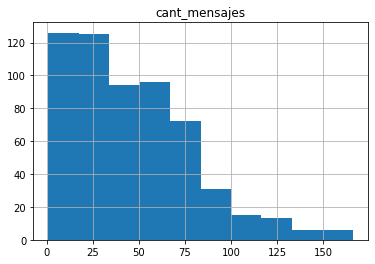

In [ ]:
# Gráfico mostrando la distribución de los mensajes enviados por los usuarios para el plan ultimate 

info_ultimate.hist('cant_mensajes')


array([[<AxesSubplot:title={'center':'cant_mensajes'}>]], dtype=object)

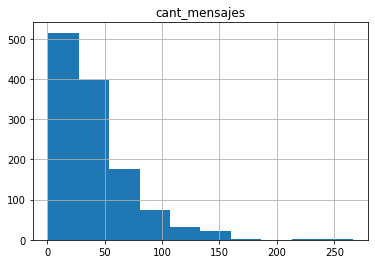

In [ ]:
# Gráfico mostrando la distribución de los mensajes enviados por los usuarios para el plan surf

info_surf.hist('cant_mensajes')

Como se puede observar, ambos gráficos tienen una distribución de datos sesgada a la derecha. También podemos observar que los clientes que tienen el plan surf, tienden a pasarse de la cantidad de sms incluidos en su plan.

In [ ]:
#Cálculo de media, varianza y desviación estándar para ambos planes

mean_ultimate_mensajes= info_ultimate['cant_mensajes'].mean() 
var_ulti_mensajes= np.var(info_ultimate['cant_mensajes'])
desv_mensajes= np.std(info_ultimate['cant_mensajes'])

mean_ultimate_surf= info_surf['cant_mensajes'].mean() 
var_ulti_surf= np.var(info_surf['cant_mensajes'])
desv_surf= np.std(info_surf['cant_mensajes'])

print('Comparación de mensajes promedio por mes para los planes: Ultimate y Surf \n')
print('Información Ultimate:\n', 'Mean:',mean_ultimate_mensajes ,'\n', 'Varianza:',var_ulti_mensajes,'\n', 'Desviacion estándar:', desv_mensajes,'\n' )
print('Información Surf:\n', 'Mean:',mean_ultimate_surf,'\n','Varianza:',var_ulti_surf,'\n','Desviación estándar:',desv_surf)

Comparación de mensajes promedio por mes para los planes: Ultimate y Surf 

Información Ultimate:
 Mean: 46.29623287671233 
 Varianza: 1083.3249173156314 
 Desviacion estándar: 32.91390158148425 

Información Surf:
 Mean: 40.10965630114566 
 Varianza: 1090.4511506183685 
 Desviación estándar: 33.02197981070137


Con respecto a la media, varianza y desviación estándar en ambos planes, podemos observar que la desviación estándar es prácticamente la misma en ambos casos. Los valores de surf plan estan un poco mas dispersos que los de ultimate.

<AxesSubplot:title={'center':'cant_mensajes'}, xlabel='plan'>

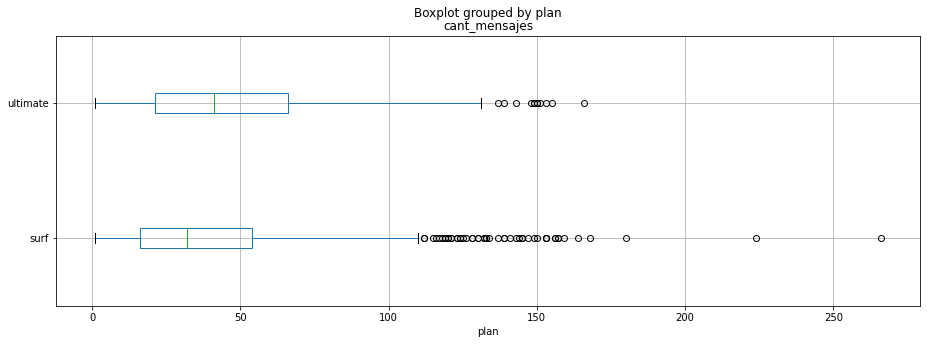

In [ ]:
datos.boxplot(column= 'cant_mensajes', by='plan', vert=False, figsize= (15,5)) 

A continuación se veran los histogramas de la duración de las llamadas para ambos planes.

array([[<AxesSubplot:title={'center':'duracion'}>]], dtype=object)

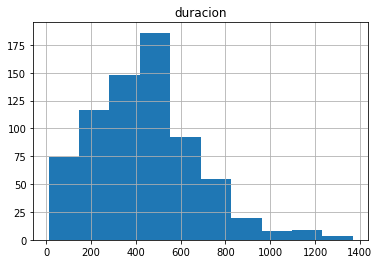

In [ ]:
# Gráfico mostrando la distribución de la duración de las llamadas realizadas por los usuarios para el plan ultimate 

info_ultimate.hist('duracion')

array([[<AxesSubplot:title={'center':'duracion'}>]], dtype=object)

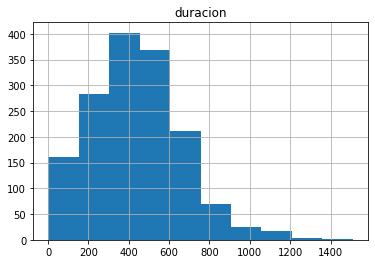

In [ ]:
# Gráfico mostrando la distribución de la duración de las llamadas realizadas por los usuarios para el plan surf

info_surf.hist('duracion')

Ambos gráficos tienen una leve distribución de los datos sesgada a la derecha. Ambas medianas rondan los 400. El rango de los gráficos es similar. Con respecto a los excesos, podemos ver que algunos clientes del plan surf exceden la cantidad de minutos (500) incluídos en su plan. 

In [ ]:
#Cálculo de media, varianza y desviación estándar de la duración de las llamadas para ambos planes.

mean_ultimate_llamadas= info_ultimate['duracion'].mean() 
var_ulti_llamadas= np.var(info_ultimate['duracion'])
desv_llamadas= np.std(info_ultimate['duracion'])

mean_ultimate_surf= info_surf['duracion'].mean() 
var_ulti_surf= np.var(info_surf['duracion'])
desv_surf= np.std(info_surf['duracion'])

print('Comparación de duración de llamadas promedio por mes para los planes: Ultimate y Surf \n')
print('Información Ultimate:\n', 'Mean:',mean_ultimate_llamadas ,'\n', 'Varianza:',var_ulti_llamadas,'\n', 'Desviacion estándar:', desv_llamadas,'\n' )
print('Información Surf:\n', 'Mean:',mean_ultimate_surf,'\n','Varianza:',var_ulti_surf,'\n','Desviación estándar:',desv_surf)

Comparación de duración de llamadas promedio por mes para los planes: Ultimate y Surf 

Información Ultimate:
 Mean: 435.2865168539326 
 Varianza: 56307.88981820478 
 Desviacion estándar: 237.29283558128083 

Información Surf:
 Mean: 436.80246113989637 
 Varianza: 52447.570434357294 
 Desviación estándar: 229.01434547721524


Con respecto a la media, varianza y desviación estándar podemos observar que la media es practicamente la misma en ambos planes pero la dispersión de los datos del plan ultimate es mayor que los de surf. 

<AxesSubplot:title={'center':'duracion'}, xlabel='plan'>

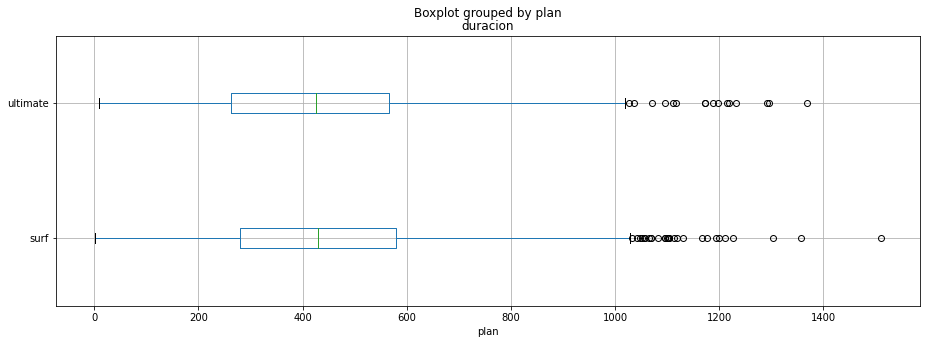

In [ ]:
datos.boxplot(column= 'duracion', by='plan', vert=False, figsize= (15,5)) 

A continuación se presentan los gráficos para el uso promedio de internet de ambos planes

array([[<AxesSubplot:title={'center':'gigas'}>]], dtype=object)

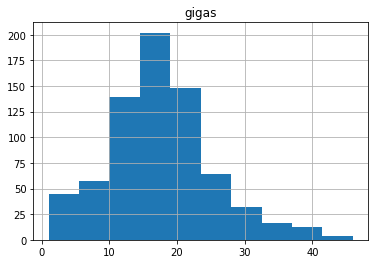

In [ ]:
# Gráfico mostrando la distribución del uso promedio de internet por los usuarios del plan ultimate

info_ultimate.hist('gigas')

array([[<AxesSubplot:title={'center':'gigas'}>]], dtype=object)

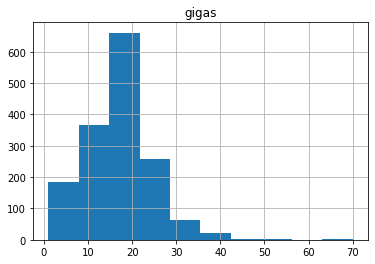

In [ ]:
# Gráfico mostrando la distribución del uso promedio de internet por los usuarios del plan surf

info_surf.hist('gigas')

Los gráficos muestran una distribución de los datos bastante pareja en ambos planes. El plan ultimate, muestra un conjunto de datos practicamente simétrico y el plan surf muestra un muy leve sesgo negativo. Con respecto a los límites de uso de internet incluídos en los planes, hay más cantidad de clientes del plan surf que consume por arriba de ese límite con respecto a los clientes que tienen el plan ultimate. 

In [ ]:
#Cálculo de media, varianza y desviación estándar para el uso promedio de mb para ambos planes.

mean_ultimate_mb= info_ultimate['gigas'].mean() 
var_ulti_mb= np.var(info_ultimate['gigas'])
desv_mb= np.std(info_ultimate['gigas'])

mean_ultimate_surf= info_surf['gigas'].mean() 
var_ulti_surf= np.var(info_surf['gigas'])
desv_surf= np.std(info_surf['gigas'])

print('Comparación de uso de MB promedio por mes para los planes: Ultimate y Surf \n')
print('Información Ultimate:\n', 'Mean:',mean_ultimate_mb ,'\n', 'Varianza:',var_ulti_mb,'\n', 'Desviación estándar:', desv_mb,'\n' )
print('Información Surf:\n', 'Mean:',mean_ultimate_surf,'\n','Varianza:',var_ulti_surf,'\n','Desviación estándar:',desv_surf)

Comparación de uso de MB promedio por mes para los planes: Ultimate y Surf 

Información Ultimate:
 Mean: 17.331015299026426 
 Varianza: 58.413377411448835 
 Desviación estándar: 7.642864476846939 

Información Surf:
 Mean: 16.831193838254173 
 Varianza: 59.43556096242673 
 Desviación estándar: 7.709446216326223


Con respecto a la media, varianza y desviación estándar, podemos observar que los datos son casi iguales en ambos planes, tienen un comportamiento muy similar.

<AxesSubplot:title={'center':'gigas'}, xlabel='plan'>

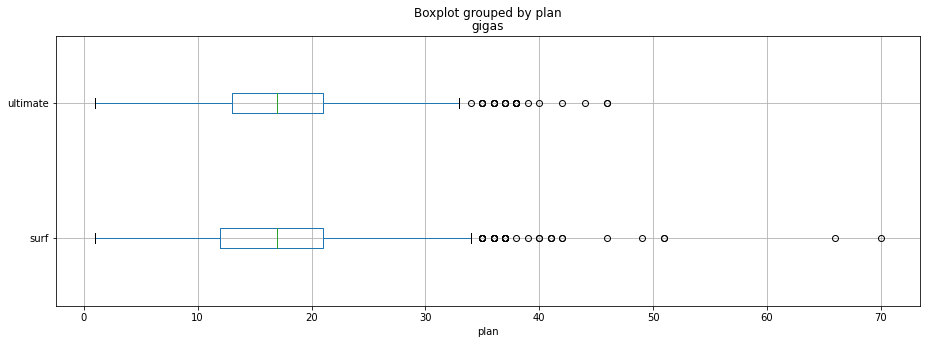

In [ ]:
datos.boxplot(column= 'gigas', by='plan', vert=False, figsize= (15,5)) 


Para concluir, podríamos decir que los clientes del plan surf, tienden a pasar el límite de los valores incluídos en su plan.


La siguiente tabla muestra los ingresos promedio mensuales por plan 

<AxesSubplot:title={'center':'Ingresos por plan'}, xlabel='plan'>

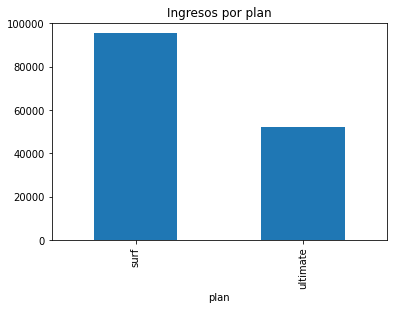

In [ ]:
# Gráfico mostrando el ingreso promedio mensual por plan

ingreso= datos.groupby('plan')['ingreso'].sum()
ingreso.plot(kind='bar', title='Ingresos por plan')

Podemos observar que los ingresos generados por el plan surf son mayores.

## Prueba de hipótesis.

A continuación, voy a probar las hipótesis planteadas.

### Prueba 1:

Antes de realizar la prueba de hipótesis, vamos a chequera si las varianzas son iguales o difieren mediante la prueba de Levene.
La hipótesis nula de Levene es que las varianzas son iguales, la hipótesis alternativa es que son diferentes.

In [ ]:
#Hipótesis nula levene: varianzas son iguales

from scipy.stats import levene

ingreso_mensual_ultimate= info_ultimate['ingreso']
ingreso_mensual_surf= info_surf['ingreso']

alpha= 0.05

stat, results= levene(ingreso_mensual_ultimate,ingreso_mensual_surf)
print('P_value:', results)

if results < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No rechazo hipótesis nula')

P_value: 3.070976609395645e-83
Rechazo la hipótesis nula


Chequeamos hipótesis 1: 
Para el primer caso, la hipótesis nula será que los ingresos generados en los planes ultimate y surf son iguales y la hipótesis alternativa que los ingresos generados en ambos planes son distintos.

In [ ]:
# Ho: El ingreso de los usuarios de las tarifas Ultimate y Surf no difiere.
ingreso_mensual_ultimate= info_ultimate['ingreso']
ingreso_mensual_surf= info_surf['ingreso']

alpha= 0.05

results= st.ttest_ind(ingreso_mensual_ultimate,ingreso_mensual_surf, equal_var=False)
print('P_value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo hipótesis nula')
else:
    print('No rechazo la hipótesis nula')
    

P_value: 1.218411585212325e-15
Rechazo hipótesis nula


En base al análisis, podemos decir que los ingresos para el plan ultimate y surf son diferentes. 

### Prueba 2:

A continuación, primero segmentaré los datos para los clientes que habitan en el área NY/NJ y el resto de las áreas para luego poceder a la prueba de la hipótesis..

In [ ]:
datos_ny= datos.query('city =="New York-Newark-Jersey City, NY-NJ-PA MSA"')
datos_ny.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cant_llamadas,duracion,cant_mensajes,gigas,ingreso
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,29.0,304.0,1.0,11.0,70.0
32,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,53.0,483.0,2.0,22.0,70.0
33,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,59.0,515.0,3.0,13.0,70.0
34,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,61.0,563.0,2.0,19.0,70.0
35,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,72.0,611.0,1.0,16.0,70.0


In [ ]:
datos_resto= datos.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
datos_resto.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cant_llamadas,duracion,cant_mensajes,gigas,ingreso
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,16.0,124.0,11.0,2.0,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,...,70,7,0.01,0.01,ultimate,2.0,10.0,15.0,3.0,70.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,...,70,7,0.01,0.01,ultimate,7.0,59.0,139.0,32.0,84.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,54.0,476.0,21.0,17.0,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,...,70,7,0.01,0.01,ultimate,50.0,446.0,37.0,24.0,70.0


Antes de realizar la prueba de hipótesis número 2, vamos a chequera si las varianzas son iguales o difieren mediante la prueba de Levene.
La hipótesis nula de Levene es que las varianzas son iguales, la hipótesis alternativa es que son diferentes.

In [ ]:
#Hipótesis nula levene: varianzas son iguales


ny= datos_ny['ingreso']
resto= datos_resto['ingreso']

alpha= 0.05

stat, results= levene(ny, resto)
print('P_value:', results)

if results < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No rechazo hipótesis nula')

P_value: 0.13166997048838908
No rechazo hipótesis nula


A continuación se probará otra hipótesis donde la hipótesis nula es: los ingresos generados por los clientes que viven en el área de NY/NJ son iguales a los de los clientes en otras regiones. La hipótesis alternativa es que los ingresos generados por los clientes en el área de NY/NJ es distinta a los ingresos generados por los clientes en otras regiones.

In [ ]:
# Hipótesis nula: los ingresos son iguales para ambas regiones

ny= datos_ny['ingreso']
resto= datos_resto['ingreso']

alpha= 0.05

results= st.ttest_ind(ny,resto, equal_var=True)
print('P_value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No rechazo la hipótesis nula')
  

P_value: 0.049745282774076104
Rechazo la hipótesis nula


Con la información con la que contamos, podemos decir que los ingresos generados por los clientes de la región de NY/NJ difiere a los ingresos generados por los clientes de otras regiones.

## CONCLUSIÓN GENERAL.

Para concluir, en base a la muestra de datos recibida, podemos decir que los ingresos generados por los dos planes ultimate y surf son distintos. El plan surf genera más ingresos que el plan ultimate.

A partir de los gráficos,se observa que hay mayor tendencia por parte de los clientes que tienen el plan surf de pasarse de los límites incluídos en sus planes, generando un ingreso extra para la empresa. 

También puedo agregar que el ingreso promedio mensual generado por los clinetes depende de la región en la que se encuentren.